In [1]:
import pandas as pd
from pydlm import dlm, trend, seasonality
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
HaNoi = pd.read_csv('HaNoi.csv')
BacNinh = pd.read_csv('BacNinh.csv')
QuangNinh = pd.read_csv('QuangNinh.csv')

In [3]:
def preprocess(data):
    data['date'] = pd.to_datetime(data['date'], dayfirst=True)
    data.set_index('date', inplace=True)
    data = data.sort_index()  
    return data

HaNoi = preprocess(HaNoi)
BacNinh = preprocess(BacNinh)
QuangNinh = preprocess(QuangNinh)

In [4]:
def split_data(data):
    train_ratio = 0.8
    split_point = int(len(data) * train_ratio)
    train = data['AQI'][:split_point]
    test = data['AQI'][split_point:]
    return train, test

train_hanoi, test_hanoi = split_data(HaNoi)
train_bacninh, test_bacninh = split_data(BacNinh)
train_quangninh, test_quangninh = split_data(QuangNinh)

In [5]:
len(test_hanoi)

556

In [6]:
len(train_bacninh)

952

In [7]:
def fit_predict(train, test):
    model = dlm(train) + trend(degree=1) + seasonality(period=12)  # Increase trend degree
    model.fit()
    (predictMean, predictVar) = model.predictN(N=len(test))
    return predictVar

In [8]:
def evaluate_and_plot(train, test, predictions, region_name):
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    print(f'{region_name} - MAE: {mae:.2f}, MSE: {mse:.2f}')
    
    plt.figure(figsize=(10, 6))
    plt.plot(train.index[-len(test):], test, label='Actual')
    plt.plot(train.index[-len(test):], predictions, label='Predicted')
    plt.title(f'{region_name} - Predicted vs Actual AQI')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.legend()
    plt.show()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
Ha Noi air quality index - MAE: 1403.46, MSE: 1989659.29


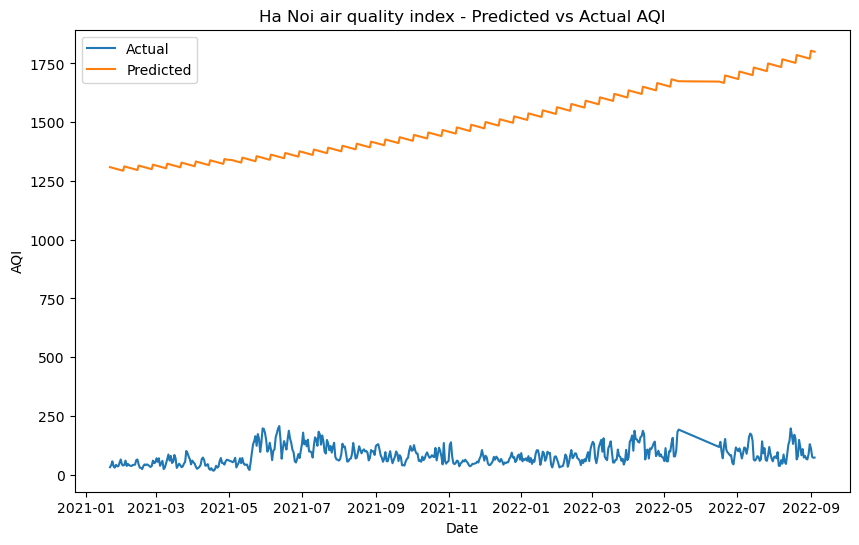

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
Bac Ninh air quality index - MAE: 1590.58, MSE: 2533529.49


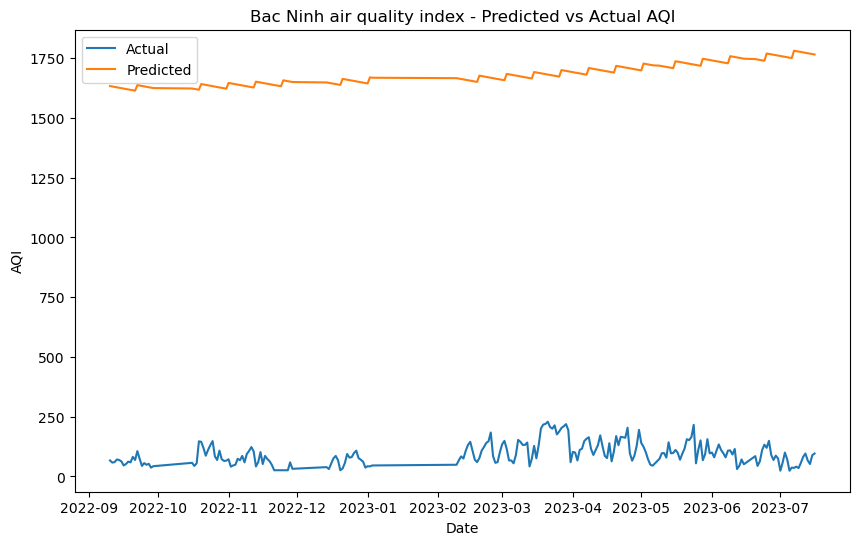

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
Quang Ninh air quality index - MAE: 304.37, MSE: 93486.41


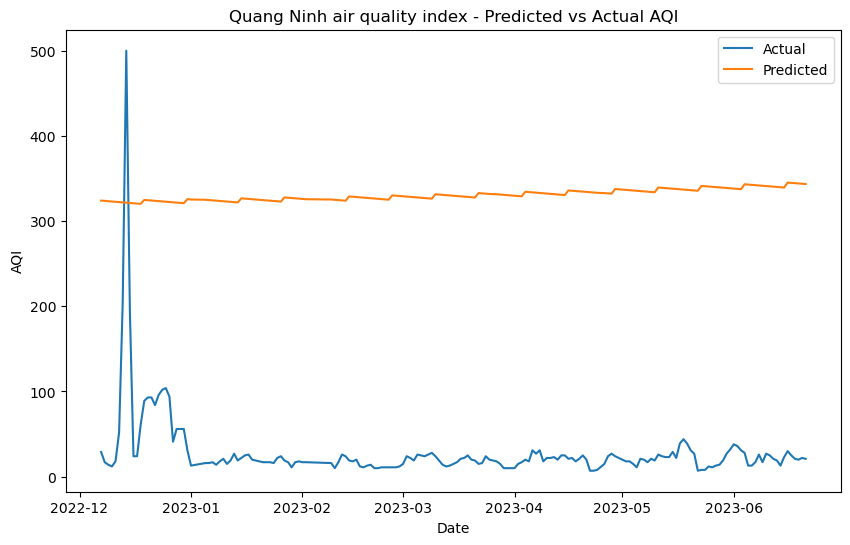

In [9]:
predictions_hanoi = fit_predict(train_hanoi, test_hanoi)
evaluate_and_plot(train_hanoi, test_hanoi, predictions_hanoi, 'Ha Noi air quality index')

predictions_bacninh = fit_predict(train_bacninh, test_bacninh)
evaluate_and_plot(train_bacninh, test_bacninh, predictions_bacninh, 'Bac Ninh air quality index')

predictions_quangninh = fit_predict(train_quangninh, test_quangninh)
evaluate_and_plot(train_quangninh, test_quangninh, predictions_quangninh, 'Quang Ninh air quality index')